In [1]:
!rm /App/output/aggregated_50.csv
!rm -rf /App/output/train_50
!mkdir /App/output/train_50

rm: cannot remove '/App/output/aggregated_50.csv': No such file or directory


In [2]:
%%bash
rm /App/logs/client.logs
echo 135980 > /App/output/train_50/validate_135980.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_135980_steps.h5f --rtt 50 --valid_congestion 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_50/validate_135980.csv
done

*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 83, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong)
  File "/App/mininettest/congestiontest.py", line 71, in do_training
    exec_test(server_cmd, rtt)
  File "/App/mininettest/congestiontest.py", line 28, 

In [4]:
!cat /App/output/train_50/validate_135980.csv

135980
2336.129543
2315.124380
2274.958394
2277.124528
2415.804094
2446.747404
2291.961247
2442.894114
2442.894114
2392.224785
2356.909242
2302.382967
2469.588665
2406.991021
2536.194591
2496.400700
2357.345874
2298.540583
2295.937326
2389.579770
2407.195626
2461.735031
2461.735031
2397.435209
2250.274290
2396.883531
2396.883531
2279.868060
2447.249296
2447.249296
2410.498755
2407.846999
2294.435811
2294.435811
2387.973099
2320.629031
2534.563887
2534.563887
2272.620360
2306.879385
2634.613229
2634.613229
2326.489695
2234.118098
2426.321834
2388.052549
2361.747237
2388.198911
2388.198911
2524.905490
2319.566684
2341.161945
2347.962593
2414.163314
2357.364460
2357.364460
2445.129310
2324.163189
2324.163189
2478.757232
2583.257326
2583.257326
2399.976636
2399.976636
2499.497252
2356.728245
2356.728245
2463.209567
2463.209567
2537.366110
2610.191160
2452.969469
2452.969469
2342.150251
2249.284312
2390.873651
2274.908564
2359.018408
2493.573139
2299.089796
2299.089796
2379.711114
2379.7111

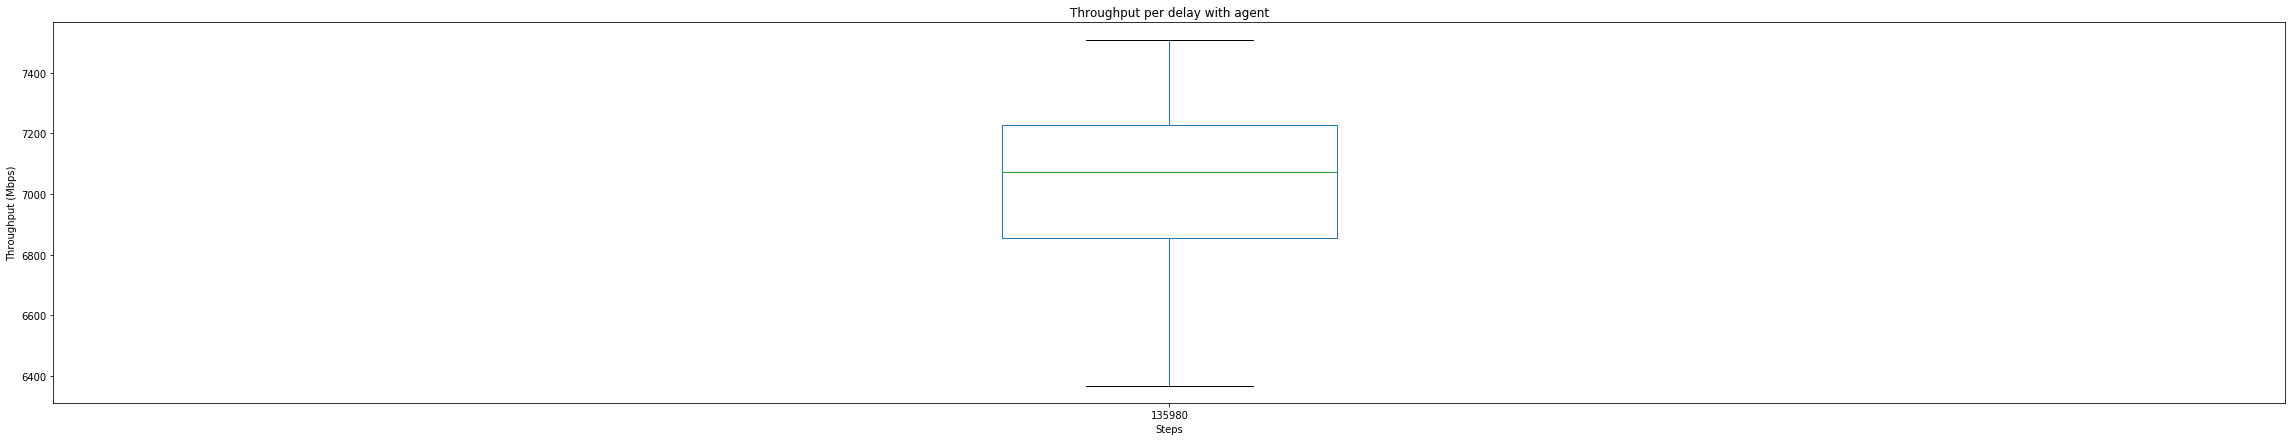

In [6]:
import pandas

rtt_135980 = pandas.read_csv("/App/output/train_50/validate_135980.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(40, 7)

(2*8 * 1024 * 1024 / rtt_135980).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [7]:
(2*8 * 1024 * 1024 / rtt_135980).median()

135980    7073.368043
dtype: float64

In [8]:
(2*8 * 1024 * 1024 / rtt_135980).mean()

135980    7039.462705
dtype: float64